In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
conda install -c anaconda pydotplus


Note: you may need to restart the kernel to use updated packages.


In [3]:
dataset = pd.read_excel('data.xlsx')
dataset.columns

Index(['saat', 'gun', 'min', 'max', 'ort'], dtype='object')

In [4]:
features = dataset.filter(items=['saat','gun','min','max'])
labels = dataset.filter(items=['ort'])
features_oh = pd.get_dummies(features,columns=['gun'])
def normalize(val):
    val=(val-np.min(val))/(np.max(val)-np.min(val))
    return val
features_oh['saat'] = normalize(features_oh['saat'])
features_oh['min'] = normalize(features_oh['min'])
features_oh['max'] = normalize(features_oh['max'])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_oh,labels, test_size = 0.20, shuffle = False)

In [6]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)  #train parameters: features and target
a = dtree.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, a)

0.7662565905096661

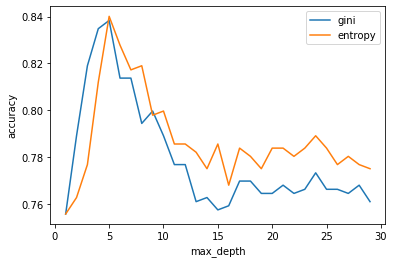

In [8]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()


In [9]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
accuracy_score(y_test, pred)

0.8400702987697716

C:\Users\Busra\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


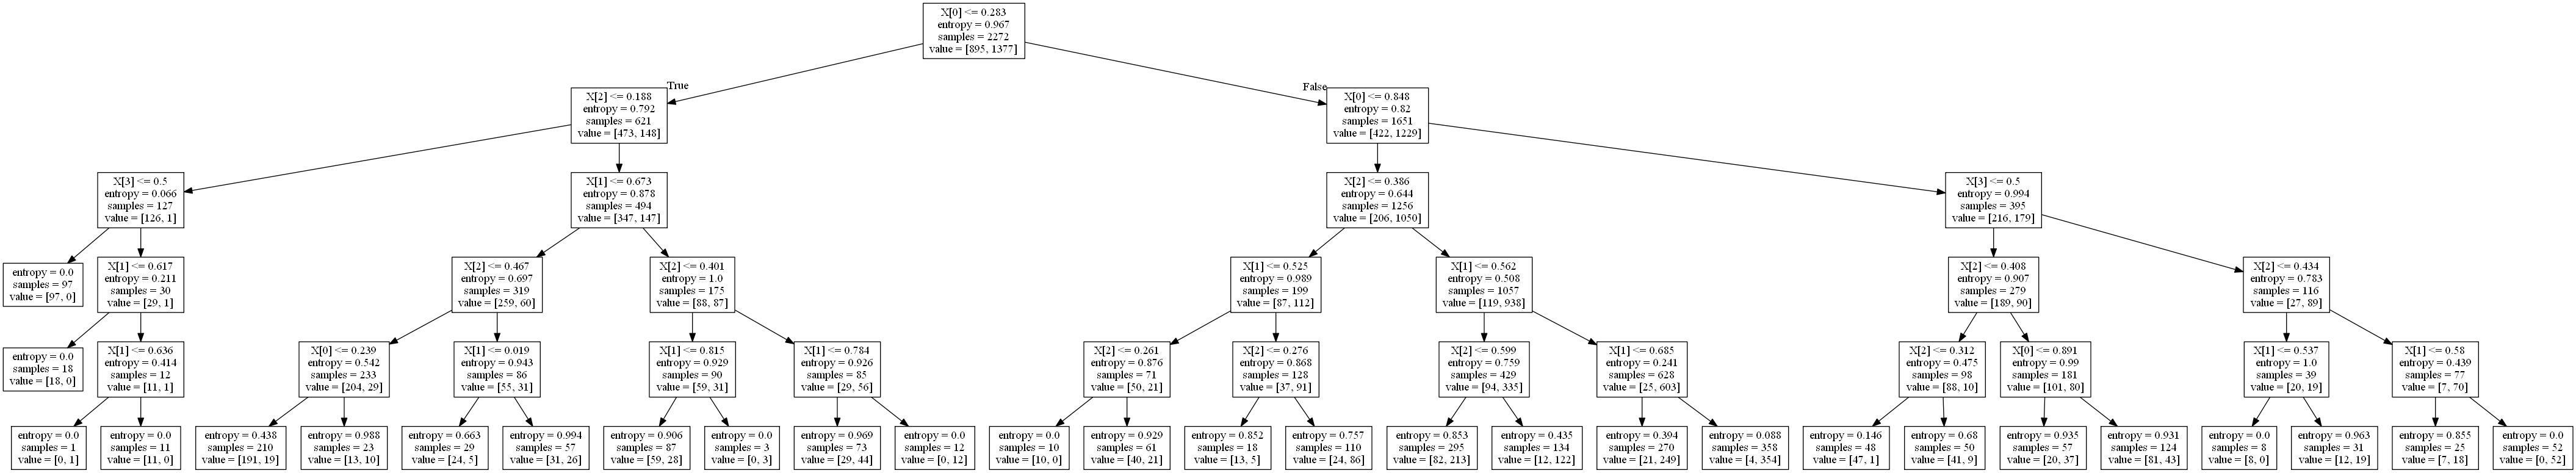

In [10]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('a.png')
Image(graph.create_png())